In [ ]:
pip install opencv-python


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

(172, 293, 3)
(800, 1500, 3)


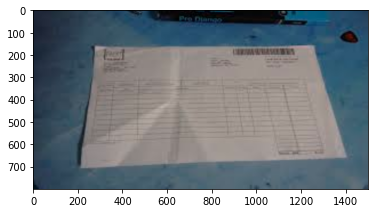

In [ ]:
img=cv2.imread("/content/images.jfif",) #read image from path
print(img.shape)
# resize the image
img=cv2.resize(img,(1500,800))
print(img.shape)

# PLOT the resize image
plt.imshow(img)
plt.show()



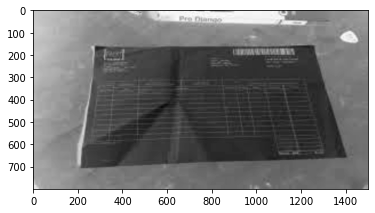

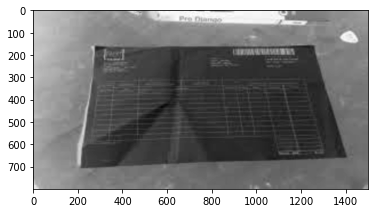

(800, 1500)


In [ ]:
orig=img.copy()
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap="binary")
plt.show()
blurred=cv2.GaussianBlur(gray,(5,5),0)
plt.imshow(blurred,cmap="binary")
plt.show()
print(gray.shape)

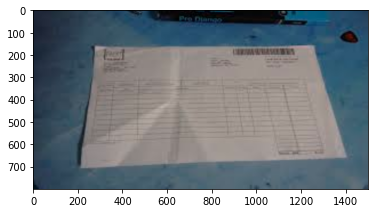

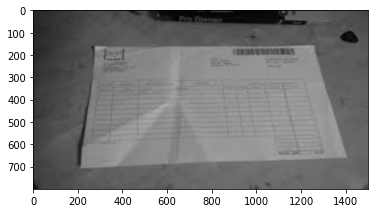

(800, 1500, 3)


In [ ]:
reg=cv2.cvtColor(blurred, cv2.COLOR_GRAY2BGR)
plt.imshow(orig)
plt.show()
plt.imshow(reg)
plt.show()
print(reg.shape)

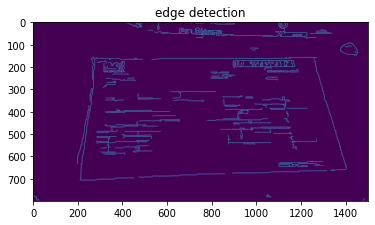

In [ ]:
edge=cv2.Canny(blurred,0,50)
orig_edge=edge.copy()
plt.imshow(orig_edge)
plt.title("edge detection")
plt.show()



In [ ]:
contours,_=cv2.findContours(edge,cv2.RETR_LIST,cv2.CHAIN_APPROX_NONE)
print(len(contours))
contours=sorted(contours,reverse=True,key=cv2.contourArea)

380


In [ ]:
for c in contours:
  p=cv2.arcLength(c,True)
  approx=cv2.approxPolyDP(c,0.01*p,True)
  if len(approx)==4:
    target=approx
    break
print(target.shape)

(4, 1, 2)


In [ ]:
def reorder(h):
  h=h.reshape((4,2))
  hnew=np.zeros((4,2),dtype=np.float32)
  add=h.sum(axis=1)
  hnew[3]=h[np.argmax(add)]
  hnew[1]=h[np.argmax(add)]
  diff=np.diff(h,axis=1)
  hnew[0]=h[np.argmax(diff)]
  hnew[2]=h[np.argmax(diff)]
  return hnew



In [ ]:
reoredr=reorder(target)
print(reoredr)


[[1160.   59.]
 [1205.   59.]
 [1160.   59.]
 [1205.   59.]]


In [ ]:
input_representaion=reoredr
output_map=np.float32([[0,0],[800,0],[800,800],[0,800]])

In [ ]:
M=cv2.getPerspectiveTransform(input_representaion,output_map)
ans=cv2.warpPerspective(orig,M,(800,800))

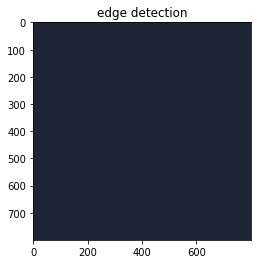

In [ ]:
plt.imshow(ans)
plt.title("edge detection")
plt.show()